In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
spotify_data = pd.read_csv('/Users/chenboyan/Desktop/UoE files/AML/Spotify_Dataset_V3.csv', delimiter=';')

## Basic Data Overview and Cleanup 

In [3]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rank                              651936 non-null  int64  
 1   Title                             651936 non-null  object 
 2   Artists                           651936 non-null  object 
 3   Date                              651936 non-null  object 
 4   Danceability                      651936 non-null  float64
 5   Energy                            651936 non-null  float64
 6   Loudness                          651936 non-null  float64
 7   Speechiness                       651936 non-null  float64
 8   Acousticness                      651936 non-null  float64
 9   Instrumentalness                  651936 non-null  float64
 10  Valence                           651936 non-null  float64
 11  # of Artist                       651936 non-null  o

## Exploratory Data Analysis

/var/folders/sn/h8d51pl11v7gk924jh1nrm_m0000gn/T/ipykernel_55294/397616973.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  spotify_data['Date'] = pd.to_datetime(spotify_data['Date'], errors='coerce')


unique_dates_count:  2336


<Figure size 2500x800 with 0 Axes>

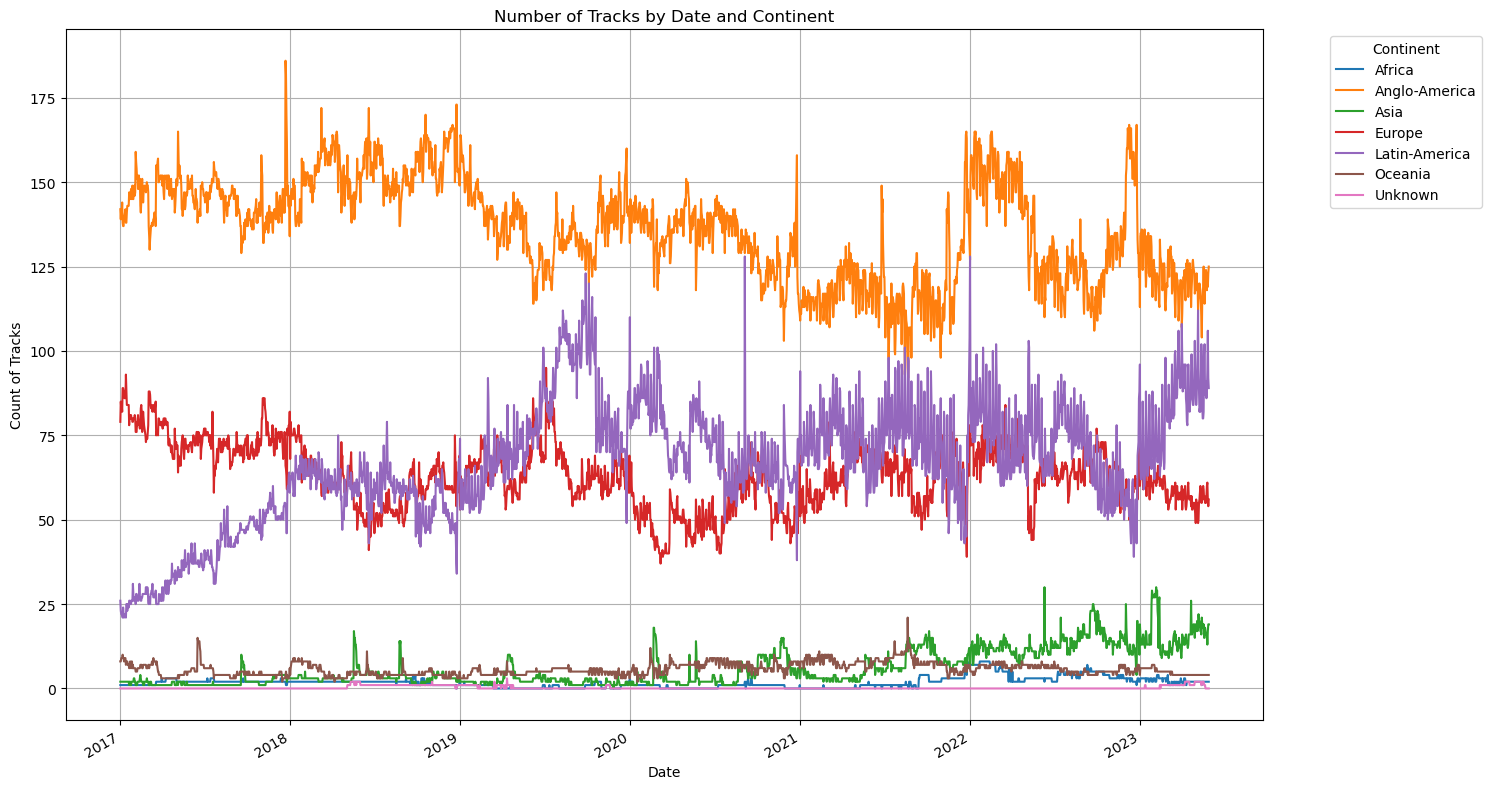

In [4]:
# Convert the Date column to a datetime format for analysis
spotify_data['Date'] = pd.to_datetime(spotify_data['Date'], errors='coerce')
# Count the number of unique dates in the dataset
unique_dates_count = spotify_data['Date'].nunique()
# Group by Date and Continent to get the count of entries for each continent on each date
date_continent_counts = spotify_data.groupby(['Date', 'Continent']).size().unstack(fill_value=0)
print("unique_dates_count: ",unique_dates_count)
# Plotting the counts by Date and Continent to visualize trends over time
plt.figure(figsize=(25, 8))
date_continent_counts.plot(kind='line', stacked=False, figsize=(15, 8))
plt.xlabel("Date")
plt.ylabel("Count of Tracks")
plt.title("Number of Tracks by Date and Continent")
plt.grid(True)
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [5]:
# 使用正则表达式提取 `# of Artist` 列中的数字部分并转换为整数
spotify_data['# of Artist'] = spotify_data['# of Artist'].str.extract('(\d+)').astype(int)
# Calculate the number of artists per song
spotify_data['artists_num'] = spotify_data.groupby('id')['# of Artist'].transform('max')
spotify_data.head()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/sn/h8d51pl11v7gk924jh1nrm_m0000gn/T/ipykernel_55294/3966444393.py:2: SyntaxWarning: invalid escape sequence '\d'
  spotify_data['# of Artist'] = spotify_data['# of Artist'].str.extract('(\d+)').astype(int)


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,artists_num
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,...,1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,...,2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2
2,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4019.0,0.061,0.143,0.629,...,1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,1
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,...,1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,...,2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2


In [6]:
# 统计每个艺术家的出现次数，并将结果作为新列 'artist_appearance'
spotify_data['artist_appearance'] = spotify_data.groupby('Artist (Ind.)')['Artist (Ind.)'].transform('size')
spotify_data.drop(columns = ['Song URL','# of Nationality','# of Artist'])
spotify_data.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,artists_num,artist_appearance
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2,171
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2,903
2,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4019.0,0.061,0.143,0.629,...,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,1,16624
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2,147
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2,903


In [7]:
# Extract the specified columns into a new DataFrame
artists_data = spotify_data[[
    'Artist (Ind.)', 'Date', 'Nationality', 'Continent',
    'Points (Ind for each Artist/Nat)', 'artist_appearance'
]].copy()

# Display the new DataFrame to verify its structure
artists_data.head()

,Artist (Ind.),Date,Nationality,Continent,Points (Ind for each Artist/Nat),artist_appearance
0,Eslabon Armado,2023-05-29,Mexico,Latin-America,100.0,171
1,Peso Pluma,2023-05-29,Mexico,Latin-America,100.0,903
2,Bad Bunny,2023-05-29,Puerto Rico,Latin-America,199.0,16624
3,Yng Lvcas,2023-05-29,Mexico,Latin-America,99.0,147
4,Peso Pluma,2023-05-29,Mexico,Latin-America,99.0,903


In [8]:
unique_artists_data = artists_data.drop_duplicates(subset=['Artist (Ind.)'])
unique_artists_data.describe()

,Date,Points (Ind for each Artist/Nat),artist_appearance
count,2208,2208.000000,2208.000000
mean,2021-04-20 06:33:15.652173824,22.030035,295.260870
min,2017-01-01 00:00:00,0.400000,1.000000
25%,2019-12-31 00:00:00,3.000000,6.000000
50%,2021-10-31 00:00:00,9.000000,48.000000
75%,2022-12-25 00:00:00,27.000000,184.250000
max,2023-05-29 00:00:00,199.000000,16624.000000
std,NaN,31.129581,945.710206


In [9]:
# 计算不同 Nationality 和 Continent 的数量
unique_nationalities = unique_artists_data['Nationality'].nunique()
unique_continents = unique_artists_data['Continent'].nunique()

print("Unique Nationalities:", unique_nationalities)
print("Unique Continents:", unique_continents)

Unique Nationalities: 74
Unique Continents: 7


In [10]:
# 按 'Nationality' 和 'Continent' 分组，并统计每组中独特的艺术家数量
nationality_counts = unique_artists_data.groupby('Nationality')['Artist (Ind.)'].nunique()
continent_counts = unique_artists_data.groupby('Continent')['Artist (Ind.)'].nunique()

# 输出结果
print("Artists per Nationality:")
print(nationality_counts)
print("\nArtists per Continent:")
print(continent_counts)

Artists per Nationality:
Nationality
ALGERIA             1
Albania             3
Argentina          32
Australia          32
Austria             3
                 ... 
Ukraine             3
United Kingdom    215
United States     798
Unknown             6
Venezuela           7
Name: Artist (Ind.), Length: 74, dtype: int64

Artists per Continent:
Continent
Africa            27
Anglo-America    875
Asia             119
Europe           660
Latin-America    485
Oceania           36
Unknown            6
Name: Artist (Ind.), dtype: int64


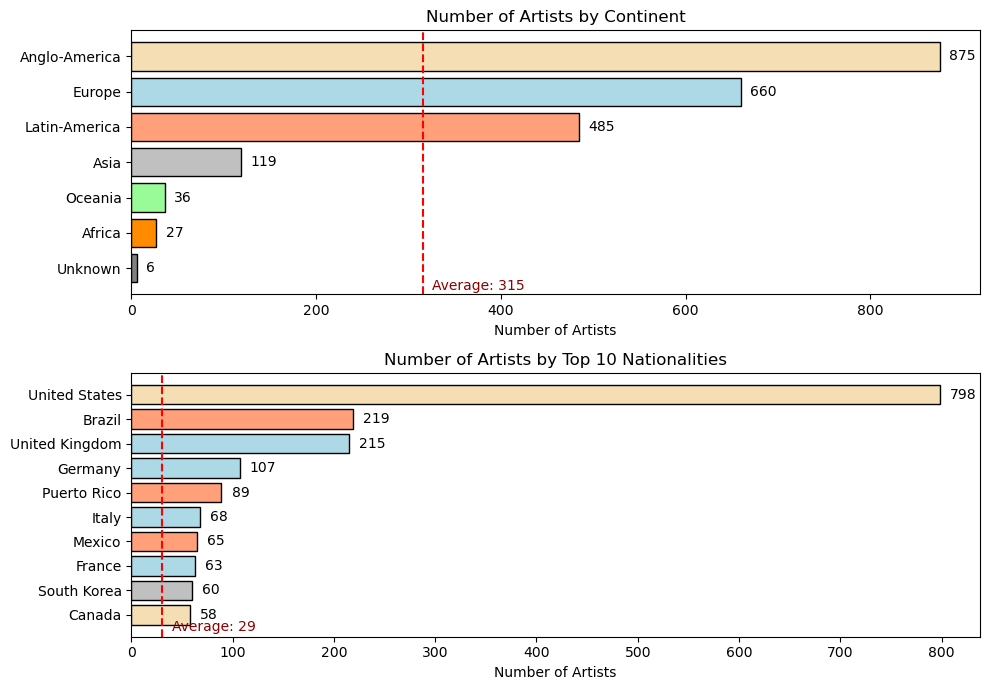

In [11]:
import matplotlib.pyplot as plt

# 定义大洲颜色映射
continent_colors = {
    'Africa': 'darkorange',
    'Anglo-America': 'wheat',
    'Asia': 'silver',
    'Europe': 'lightblue',
    'Latin-America': 'lightsalmon',
    'Oceania': 'palegreen',
    'Unknown': 'gray'
}
# 按降序排列 continent 和 nationality 出现次数
sorted_continent_counts = continent_counts.sort_values(ascending=True)
top_10_nationalities = nationality_counts.nlargest(10).sort_values(ascending=True)

# 根据大洲映射获取颜色列表
continent_colors_list = [continent_colors[continent] for continent in sorted_continent_counts.index]

# 定义国家到大洲的映射
nationality_to_continent = {
    'United Kingdom':'Europe',
    'France':'Europe',
    'Italy':'Europe',
    'Germany':'Europe',
    'United States': 'Anglo-America',
    'Brazil': 'Latin-America',
    'Mexico': 'Latin-America',
    'Puerto Rico': 'Latin-America',
    'Canada': 'Anglo-America',
    'South Korea': 'Asia',
}
# 计算平均值
continent_avg = sorted_continent_counts.mean()
nationality_avg = nationality_counts.mean()
top_10_nationality_colors = [continent_colors[nationality_to_continent[country]] for country in top_10_nationalities.index]
plt.figure(figsize=(10, 7))
# 大洲分布柱状图
plt.subplot(2, 1, 1)
bars1 = plt.barh(sorted_continent_counts.index, sorted_continent_counts.values, color=continent_colors_list, edgecolor='black')
plt.xlabel("Number of Artists")
plt.title("Number of Artists by Continent")
for bar in bars1:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center')
plt.axvline(x=continent_avg, color='red', linestyle='--')
plt.text(continent_avg + 10, -0.5, f'Average: {int(continent_avg)}', color='darkred', va='center')

# 前10国籍分布柱状图
plt.subplot(2, 1, 2)
bars2 = plt.barh(top_10_nationalities.index, top_10_nationalities.values, color=top_10_nationality_colors, edgecolor='black')
plt.xlabel("Number of Artists")
plt.title("Number of Artists by Top 10 Nationalities")
for bar in bars2:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center')
plt.axvline(x=nationality_avg, color='red', linestyle='--')
plt.text(nationality_avg + 10, -0.5, f'Average: {int(nationality_avg)}', color='darkred', va='center')

plt.tight_layout()
plt.show()

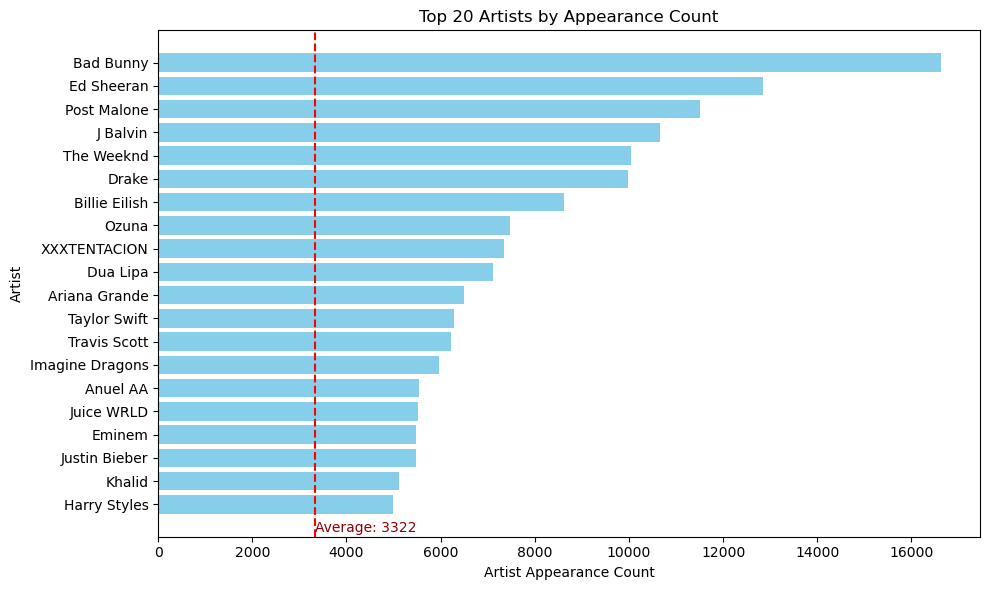

In [12]:
# Get the top 20 artists by appearance from the `artists_data`
top_20_artists = artists_data.groupby('Artist (Ind.)')['artist_appearance'].max().nlargest(20).reset_index()
appearance_avg = artists_data['artist_appearance'].mean()

# 绘制前20位艺术家的出现次数柱状图
plt.figure(figsize=(10, 6))
bars = plt.barh(top_20_artists['Artist (Ind.)'], top_20_artists['artist_appearance'], color='skyblue')
plt.xlabel("Artist Appearance Count")
plt.ylabel("Artist")
plt.title("Top 20 Artists by Appearance Count")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# 添加平均值竖线和标注
plt.axvline(x=appearance_avg, color='red', linestyle='--')
plt.text(appearance_avg + 1, 20, f'Average: {int(appearance_avg)}', color='darkred', va='center')
plt.tight_layout()
plt.show()

In [13]:
# Extract the specified columns into a new DataFrame for song data analysis
songs_data = spotify_data[[
    'Title', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Valence', 'Continent', 'Points (Total)', 'id'
]].copy()

# Remove duplicates based on the 'id' column to ensure each song appears only once
songs_data = songs_data.drop_duplicates(subset=['Date','id'])

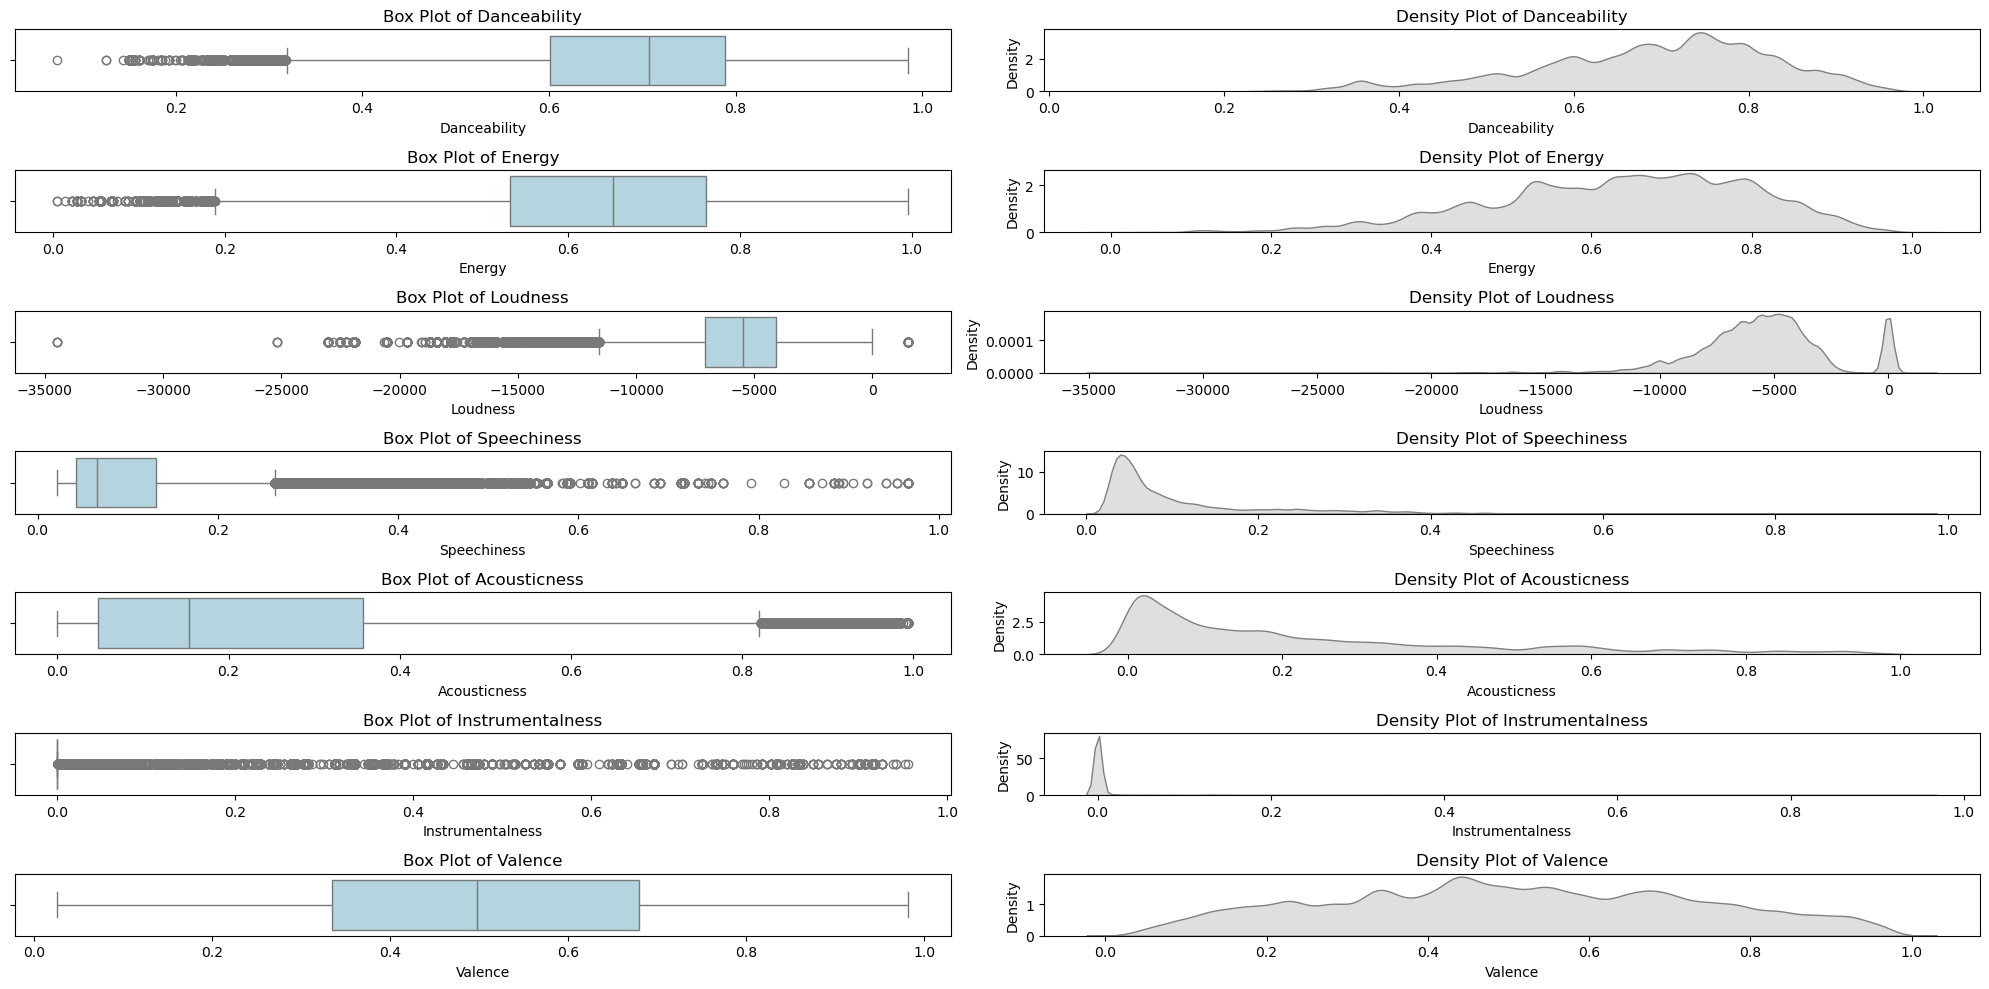

In [14]:
# 使用箱线图和核密度估计图（曲线图）分别展示每个特征的分布
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
# 设置图形大小
plt.figure(figsize=(20, 10))

# 遍历每个特征绘制箱线图和核密度估计图
for i, feature in enumerate(features, 1):
    # 绘制箱线图
    plt.subplot(7, 2, 2*i - 1)
    sns.boxplot(x=songs_data[feature], color='lightblue')
    plt.title(f"Box Plot of {feature}")
    plt.xlabel(feature)
    
    # 绘制核密度估计图
    plt.subplot(7, 2, 2*i)
    sns.kdeplot(songs_data[feature], color='grey', fill=True)
    plt.title(f"Density Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [15]:
songs_data.describe()

,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
count,467061,467061.000000,467061.000000,467061.00000,467061.000000,467061.000000,467061.000000,467061.000000,467061.000000
mean,2020-03-17 01:24:56.934233344,0.688590,0.636897,-5512.92138,0.108038,0.238650,0.008960,0.504826,100.502759
min,2017-01-01 00:00:00,0.073000,0.005000,-34475.00000,0.022000,0.000000,0.000000,0.026000,1.000000
25%,2018-08-11 00:00:00,0.601000,0.532000,-7066.00000,0.043000,0.048000,0.000000,0.335000,50.000000
50%,2020-03-17 00:00:00,0.707000,0.652000,-5482.00000,0.066000,0.154000,0.000000,0.497000,101.000000
75%,2021-10-22 00:00:00,0.789000,0.761000,-4066.00000,0.131000,0.357000,0.000000,0.679000,151.000000
max,2023-05-29 00:00:00,0.985000,0.996000,1509.00000,0.966000,0.994000,0.956000,0.982000,200.000000
std,NaN,0.138358,0.160355,2870.56916,0.097990,0.242181,0.059458,0.225138,57.737631


平均得分（按聚类分组）: Cluster
0     94.918826
1    102.668765
2    100.608631
Name: Points (Total), dtype: float64


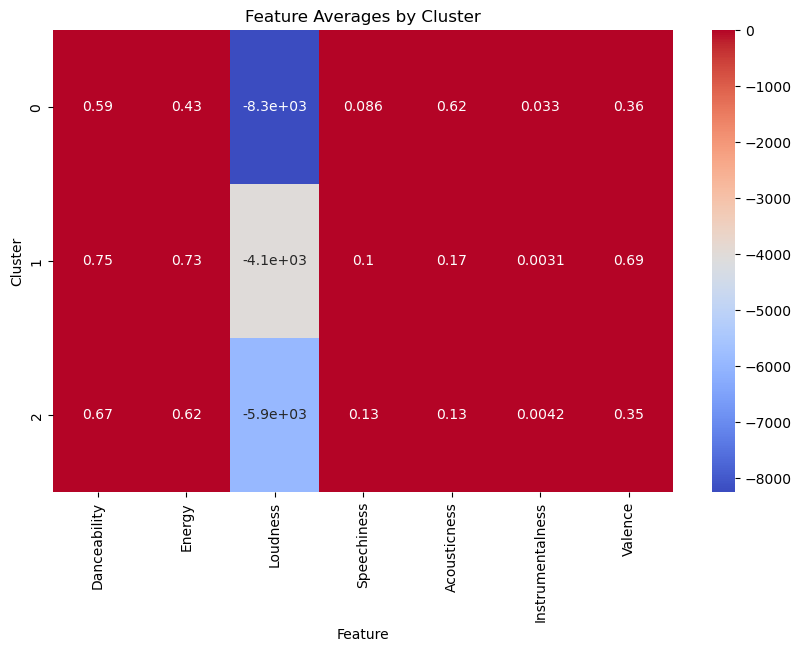

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
X = songs_data[features]
y = songs_data['Points (Total)']  # 用于后续对比高分群体

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用KMeans聚类
kmeans = KMeans(n_clusters=3)
songs_data['Cluster'] = kmeans.fit_predict(X_scaled)

# 分析每个聚类的平均得分
cluster_scores = songs_data.groupby('Cluster')['Points (Total)'].mean()
print("平均得分（按聚类分组）:", cluster_scores)

# 绘制每个聚类组的特征均值
cluster_means = songs_data.groupby('Cluster')[features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title("Feature Averages by Cluster")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.show()


In [17]:
# 计算特征与目标变量的相关性
correlations = songs_data[features + ['Points (Total)']].corr()
target_corr = correlations['Points (Total)'].drop('Points (Total)').sort_values(ascending=False)

# 打印相关性排序
print("Features sorted by correlation with Points (Total):\n", target_corr)


Features sorted by correlation with Points (Total):
 Danceability        0.054887
Loudness            0.030463
Valence             0.024503
Energy              0.013084
Speechiness        -0.005151
Instrumentalness   -0.020898
Acousticness       -0.025111
Name: Points (Total), dtype: float64


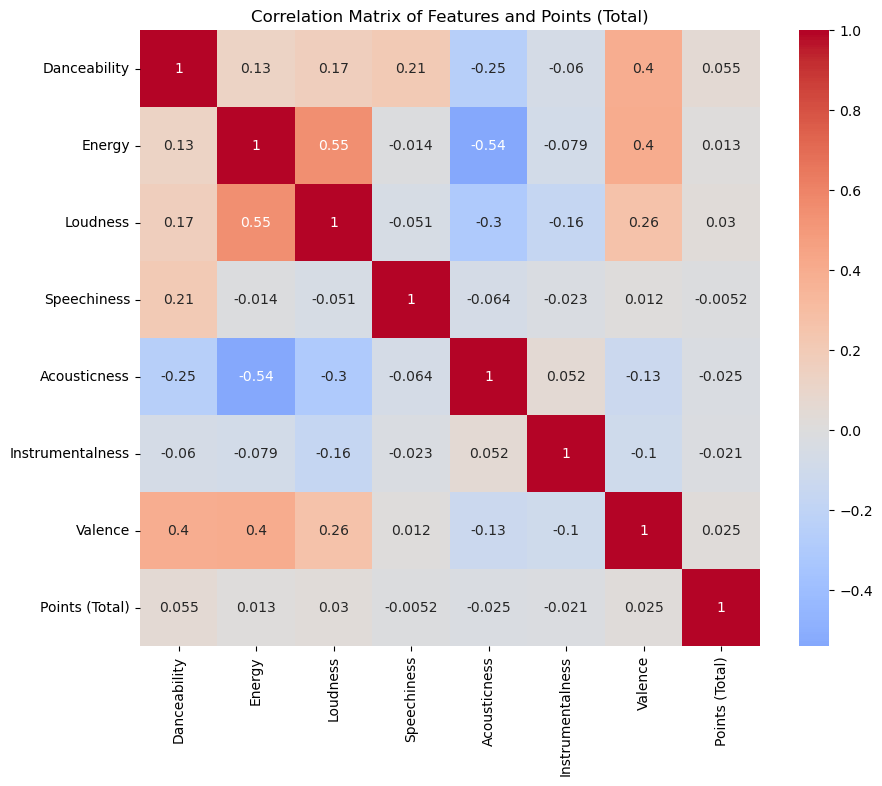

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制相关性矩阵的热图
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Features and Points (Total)")
plt.show()
